# Descriptive and Inferential Statistics

### Importing Relevant Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

%matplotlib inline

In [2]:
#specify size for plots

plt.rcParams['figure.figsize'] = [10, 7.5]

### Inferential Statistics

#### Dataset

In [3]:
data = pd.read_csv('data/shampoo.csv')

In [4]:
#observing shape
data.shape

(36, 2)

In [5]:
data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


#### Summary

In [6]:
#summary of dataset

data.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [7]:
data.Sales.mean()

312.59999999999997

In [8]:
data.Sales.std()

148.93716412347476

### Visualizations

#### Histograms

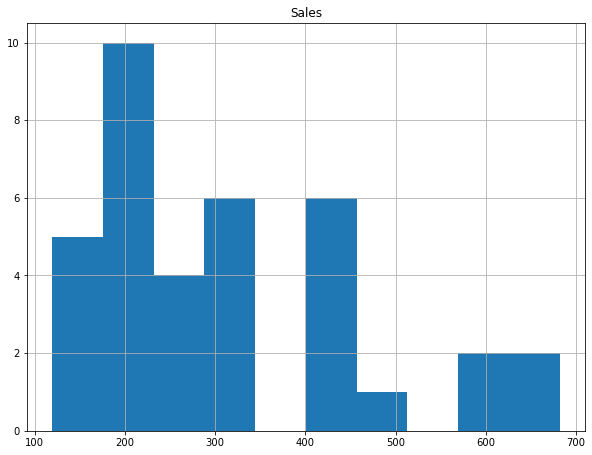

In [9]:
data.hist();

### Making the Plot Better

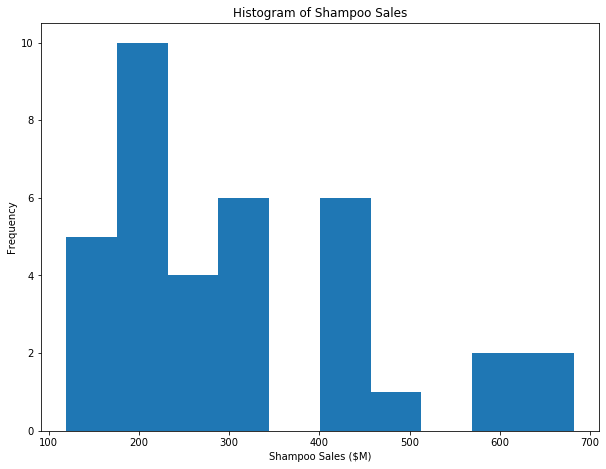

In [10]:
plt.hist(data['Sales'])
plt.title('Histogram of Shampoo Sales')
plt.xlabel('Shampoo Sales ($M)')
plt.ylabel('Frequency');

### Changing the Number of Bins

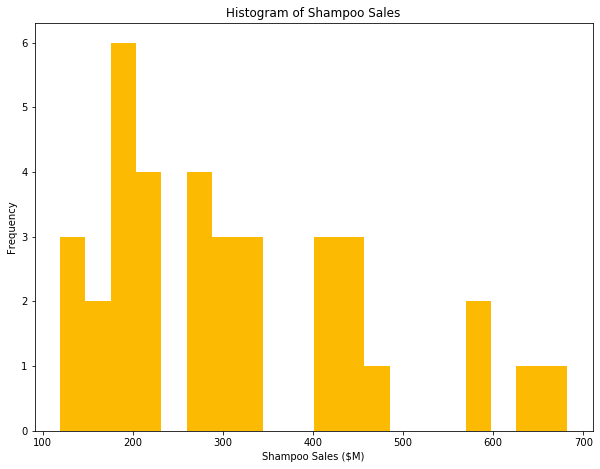

In [11]:
plt.hist(data['Sales'], bins = 20, color='#fcba03')
plt.title('Histogram of Shampoo Sales')
plt.xlabel('Shampoo Sales ($M)')
plt.ylabel('Frequency');

### Modifying it by combining it with a density plot.

You can tell that this distribution is NOT normal.

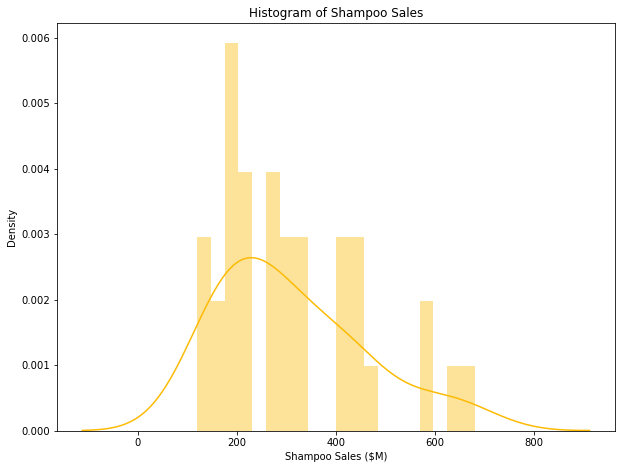

In [12]:
sns.distplot(data['Sales'], bins=20, hist=True, kde=True, color = '#fcba03')
plt.title('Histogram of Shampoo Sales')
plt.xlabel('Shampoo Sales ($M)')
plt.ylabel('Density');

### Scatter Plots

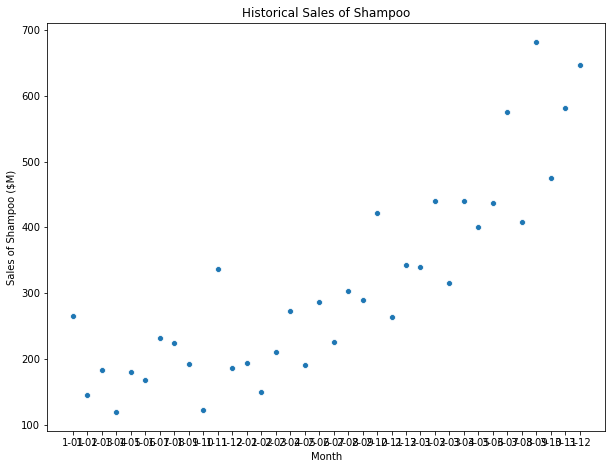

In [13]:
sns.scatterplot(x=data['Month'], y = data['Sales'])
plt.title('Historical Sales of Shampoo')
plt.ylabel('Sales of Shampoo ($M)')
plt.xlabel('Month');

## Inferential Statistics

Looking at a new dataset on Carbon Dioxide. 

In [14]:
co2_data = pd.read_csv('data/co2_dataset.csv')
co2_data.head()

,year,data_mean_global,data_mean_nh,data_mean_sh
0,0,277.454,277.454,277.454
1,1,277.137,277.137,277.137
2,2,277.160,277.160,277.160
3,3,277.158,277.158,277.158
4,4,277.157,277.157,277.157


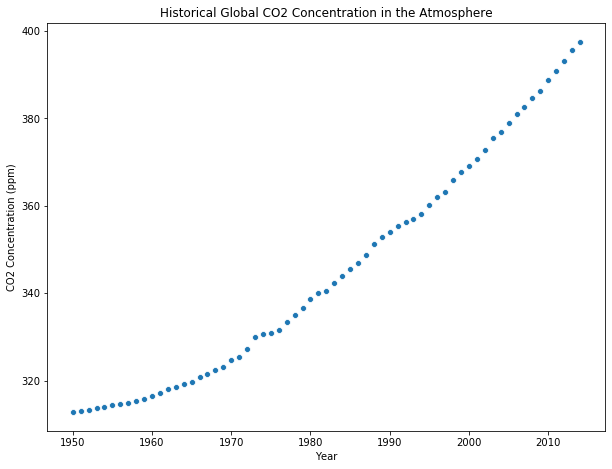

In [15]:
X = co2_data['year'].values[1950:]
y = co2_data['data_mean_global'].values[1950:]

sns.scatterplot(x=X, y=y)
plt.title('Historical Global CO2 Concentration in the Atmosphere')
plt.ylabel('CO2 Concentration (ppm)')
plt.xlabel('Year');

Now, we will try to fit a straight line to the data.
Since we have the curve at the bottom, a linear model may not be the best idea, but we're going to consider this a starting point for now. 

In [18]:
X = X.reshape(-1,1)
y=y.reshape(-1,1)

reg = LinearRegression()

reg.fit(X, y)

print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")

The slope is 1.358871192943465 and the intercept is -2348.0338300545372


This obviously doesn't account for every occurrence. For instance, at year zero, the CO2 concentration would not be negative. However, we are just using this as a baseline or a place to start. 

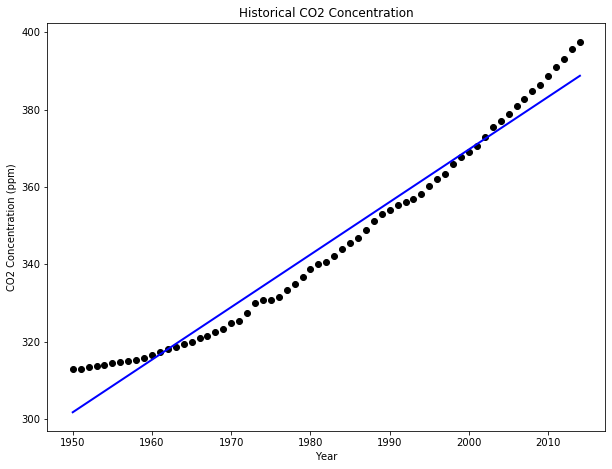

In [20]:
X = co2_data['year'].values[1950:]
y = co2_data['data_mean_global'].values[1950:]

predictions = reg.predict(X.reshape(-1,1))

plt.scatter(X,y, c = 'black')
plt.plot(X, predictions, c = 'blue', linewidth = 2)
plt.title('Historical CO2 Concentration')
plt.ylabel('CO2 Concentration (ppm)')
plt.xlabel('Year')
plt.show()

The straight line is not a perfect fit and as you can see, it is hard to say just by looking whether the line is a good fit or not. However, we can print a summary to get some of the answers that we are looking for and see if our coefficients have a p value of less than 0.05.

We are going to refit a linear model using the stats model library and OLS test.

In [21]:
X = sm.add_constant(co2_data['year'].values[1950:])

model = sm.OLS(co2_data['data_mean_global'].values[1950:], X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2073.
Date:                Sun, 22 May 2022   Prob (F-statistic):           6.40e-50
Time:                        16:39:42   Log-Likelihood:                -189.19
No. Observations:                  65   AIC:                             382.4
Df Residuals:                      63   BIC:                             386.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2348.0338     59.161    -39.689      0.0

Commentary on the new linear model and OLS test: the r-squared is fairly high and so is f-statistic. For the Constant (intercept) and x1 (slope), the p-value is small enough (under .05) suggesting that the coeficients are valid and that the model is a good fit. 

Now, we can test if this is really true with a QQ Plot. 

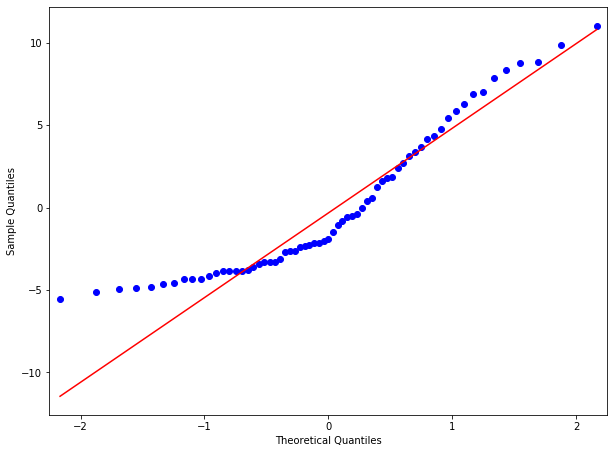

In [22]:
residuals = model.resid

qq_plot = sm.qqplot(residuals, line = 'q')

plt.show()

What do we see here? The line in blue is coming from the residuals and the red is from the theoretical normal distribution. There is a clear departure from normality evident in the blue line. Therefore, we would say that this model is NOT a good model because the residuals are NOT normally distributed and therefore NOT a result of chance. 

We can further prove this by looking at a histogram of our residuals which would not be a normal distribution based off of the QQ Plot that we just saw. 

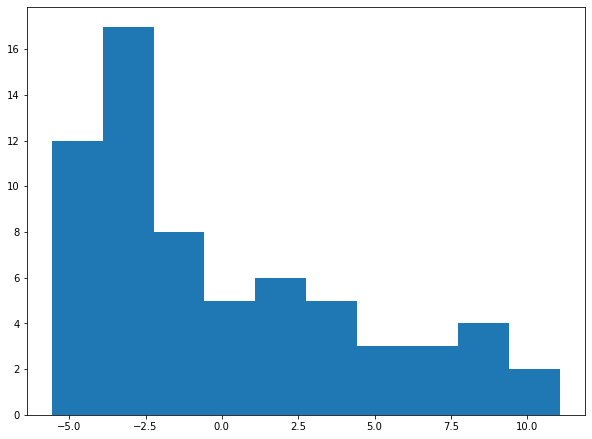

In [23]:
plt.hist(residuals);

Clearly this is not a normal distribution. In conclusion, linear regression is not a good model for predicting co2 concentration. 